Zadanie 1

<>:48: SyntaxWarning: invalid escape sequence '\s'
<>:56: SyntaxWarning: invalid escape sequence '\s'
<>:64: SyntaxWarning: invalid escape sequence '\m'
<>:48: SyntaxWarning: invalid escape sequence '\s'
<>:56: SyntaxWarning: invalid escape sequence '\s'
<>:64: SyntaxWarning: invalid escape sequence '\m'
C:\Users\lotak\AppData\Local\Temp\ipykernel_17748\3651027160.py:48: SyntaxWarning: invalid escape sequence '\s'
  plt.title('$f_1(x) = \sin(x)$')
C:\Users\lotak\AppData\Local\Temp\ipykernel_17748\3651027160.py:56: SyntaxWarning: invalid escape sequence '\s'
  plt.title('$f_2(x) = \sin(x^{-1})$')
C:\Users\lotak\AppData\Local\Temp\ipykernel_17748\3651027160.py:64: SyntaxWarning: invalid escape sequence '\m'
  plt.title('$f_3(x) = \mathrm{sgn}(\sin(8x))$')


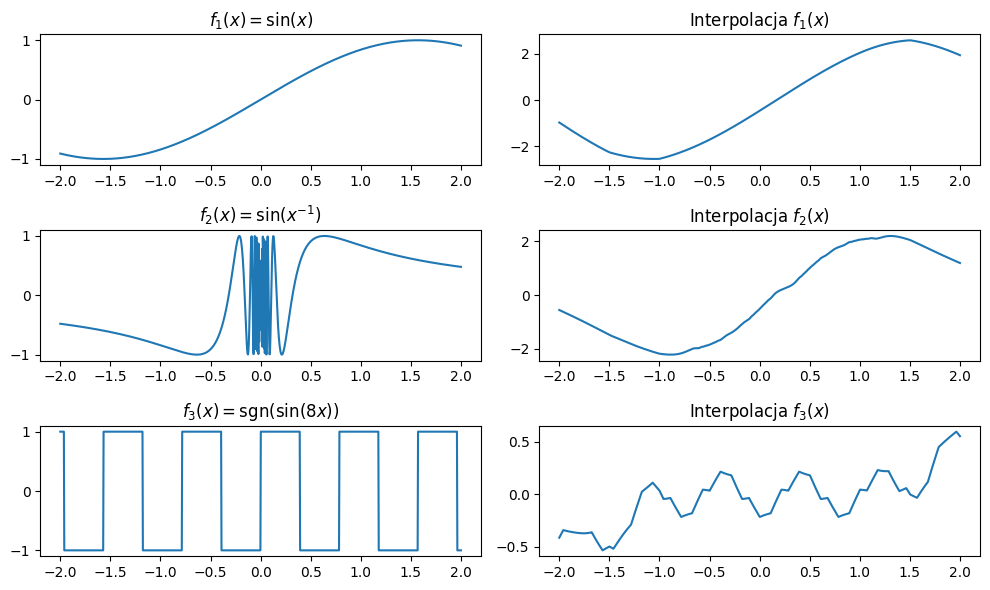

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Definicje funkcji
def f1(x):
    return np.sin(x)

def f2(x):
    return np.sin(1 / x)

def f3(x):
    return np.sign(np.sin(8 * x))

# Definicje jąder
def h1(x):
    return np.where((x >= 0) & (x < 1), 1, 0)

def h2(x):
    return np.where((x >= -0.5) & (x < 0.5), 1, 0)

def h3(x):
    return np.where((np.abs(x) >= 0) & (np.abs(x) <= 1), 1 - np.abs(x), 0)

# Przedziały i kroki
x_values = np.linspace(-2, 2, 1000)
delta_x = x_values[1] - x_values[0]

# Wykonanie konwolucji dla f1
g_f1 = delta_x * (np.convolve(f1(x_values), h1(x_values), mode='same') +
                  np.convolve(f1(x_values), h2(x_values), mode='same') +
                  np.convolve(f1(x_values), h3(x_values), mode='same'))

# Wykonanie konwolucji dla f2
g_f2 = delta_x * (np.convolve(f2(x_values), h1(x_values), mode='same') +
                  np.convolve(f2(x_values), h2(x_values), mode='same') +
                  np.convolve(f2(x_values), h3(x_values), mode='same'))

# Wykonanie konwolucji dla f3
g_f3 = delta_x * (np.convolve(f3(x_values), h1(x_values), mode='same') +
                  np.convolve(f3(x_values), h2(x_values), mode='same') +
                  np.convolve(f3(x_values), h3(x_values), mode='same'))

# Wykresy
plt.figure(figsize=(10, 6))

plt.subplot(3, 2, 1)
plt.plot(x_values, f1(x_values), label='$f_1(x)$')
plt.title('$f_1(x) = \sin(x)$')

plt.subplot(3, 2, 2)
plt.plot(x_values, g_f1, label='$g_{f1}(x)$')
plt.title('Interpolacja $f_1(x)$')

plt.subplot(3, 2, 3)
plt.plot(x_values, f2(x_values), label='$f_2(x)$')
plt.title('$f_2(x) = \sin(x^{-1})$')

plt.subplot(3, 2, 4)
plt.plot(x_values, g_f2, label='$g_{f2}(x)$')
plt.title('Interpolacja $f_2(x)$')

plt.subplot(3, 2, 5)
plt.plot(x_values, f3(x_values), label='$f_3(x)$')
plt.title('$f_3(x) = \mathrm{sgn}(\sin(8x))$')

plt.subplot(3, 2, 6)
plt.plot(x_values, g_f3, label='$g_{f3}(x)$')
plt.title('Interpolacja $f_3(x)$')

plt.tight_layout()
plt.show()


In [8]:
# Obliczenia dla f1(x)
mse_f1 = np.mean((f1(x_values) - g_f1)**2)

# Obliczenia dla f2(x)
mse_f2 = np.mean((f2(x_values) - g_f2)**2)

# Obliczenia dla f3(x)
mse_f3 = np.mean((f3(x_values) - g_f3)**2)

print("MSE dla f1(x):", mse_f1)
print("MSE dla f2(x):", mse_f2)
print("MSE dla f3(x):", mse_f3)


MSE dla f1(x): 1.3298532166114532
MSE dla f2(x): 1.1384150066574967
MSE dla f3(x): 1.0610528704854425


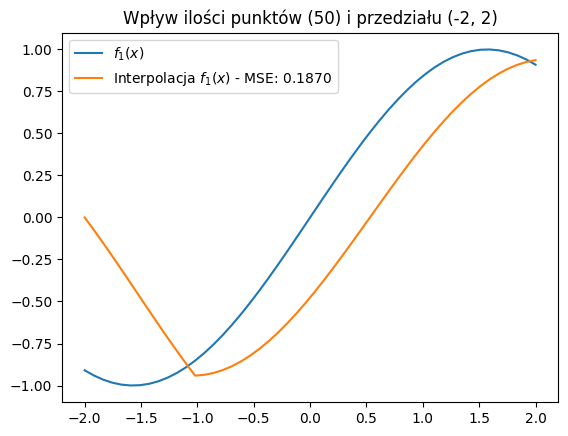

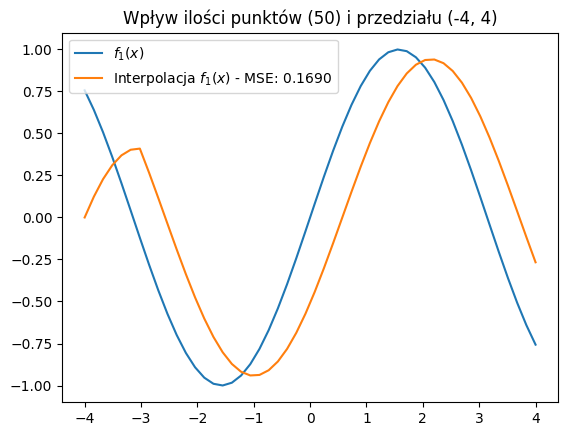

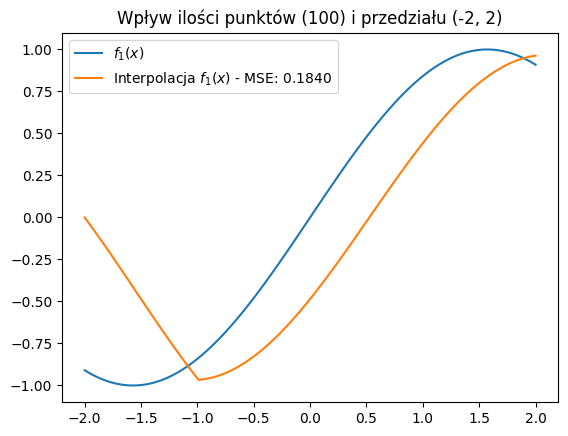

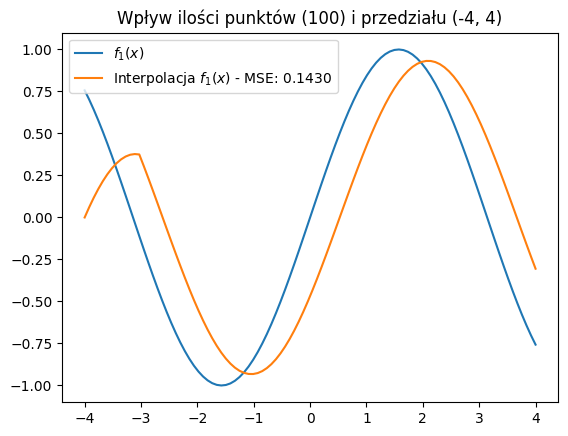

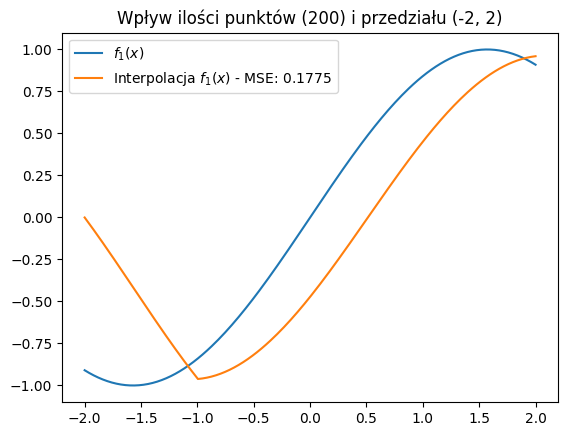

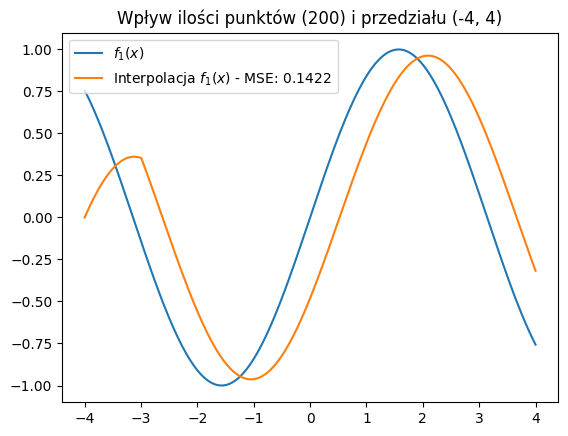

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Funkcje i jądra
def f1(x):
    return np.sin(x)

def h1(x):
    return np.where((x >= 0) & (x < 1), 1, 0)

# Parametry eksperymentu
num_points_list = [50, 100, 200]
interval_list = [(-2, 2), (-4, 4)]

# Eksperyment
for num_points in num_points_list:
    for interval in interval_list:
        x_values = np.linspace(interval[0], interval[1], num_points)
        delta_x = x_values[1] - x_values[0]

        # Konwolucja
        g_f1 = delta_x * (np.convolve(f1(x_values), h1(x_values), mode='same'))

        # MSE
        mse_f1 = np.mean((f1(x_values) - g_f1)**2)

        # Wykresy
        plt.plot(x_values, f1(x_values), label='$f_1(x)$')
        plt.plot(x_values, g_f1, label=f'Interpolacja $f_1(x)$ - MSE: {mse_f1:.4f}')
        plt.title(f'Wpływ ilości punktów ({num_points}) i przedziału {interval}')
        plt.legend()
        plt.show()


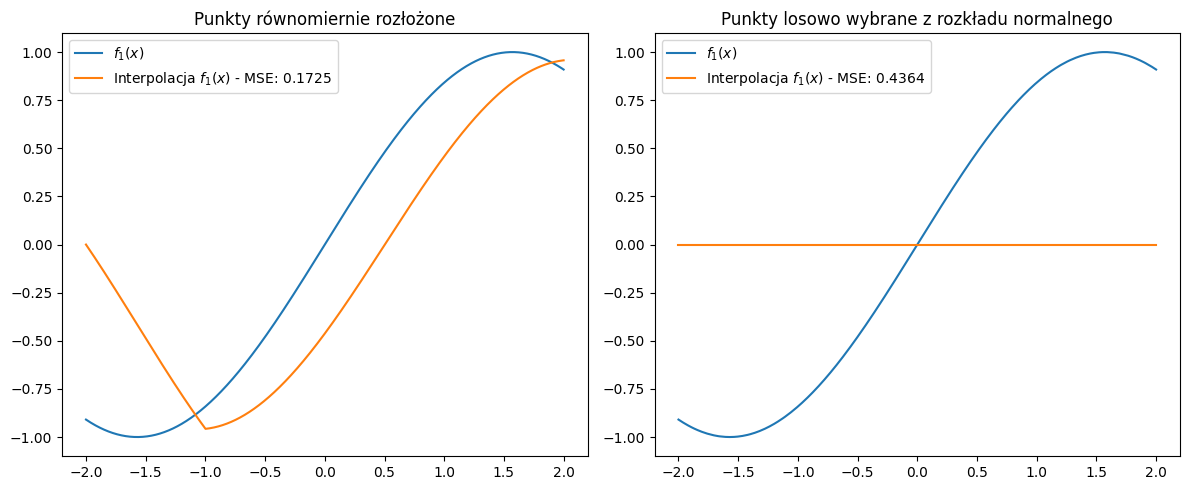

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Funkcje i jądra
def f1(x):
    return np.sin(x)

def h1(x):
    return np.where((x >= 0) & (x < 1), 1, 0)

# Parametry eksperymentu
num_points = 1000
x_range = (-2, 2)

# Punkty równomiernie rozłożone
x_uniform = np.linspace(x_range[0], x_range[1], num_points)
delta_x_uniform = x_uniform[1] - x_uniform[0]

# Punkty losowo wybrane z rozkładu normalnego
np.random.seed(42)
x_random = np.random.normal(loc=0, scale=1, size=num_points)
x_random = np.clip(x_random, x_range[0], x_range[1])  # Ograniczenie do zakresu
x_random = np.sort(x_random)  # Sortowanie punktów

delta_x_random = x_random[1] - x_random[0]

# Konwolucja dla punktów równomiernie rozłożonych
g_f1_uniform = delta_x_uniform * (np.convolve(f1(x_uniform), h1(x_uniform), mode='same'))

# Konwolucja dla punktów losowo wybranych
g_f1_random = delta_x_random * (np.convolve(f1(x_random), h1(x_random), mode='same'))

# MSE dla punktów równomiernie rozłożonych
mse_uniform = np.mean((f1(x_uniform) - g_f1_uniform)**2)

# MSE dla punktów losowo wybranych
mse_random = np.mean((f1(x_random) - g_f1_random)**2)

# Wykresy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_uniform, f1(x_uniform), label='$f_1(x)$')
plt.plot(x_uniform, g_f1_uniform, label=f'Interpolacja $f_1(x)$ - MSE: {mse_uniform:.4f}')
plt.title('Punkty równomiernie rozłożone')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_random, f1(x_random), label='$f_1(x)$')
plt.plot(x_random, g_f1_random, label=f'Interpolacja $f_1(x)$ - MSE: {mse_random:.4f}')
plt.title('Punkty losowo wybrane z rozkładu normalnego')
plt.legend()

plt.tight_layout()
plt.show()


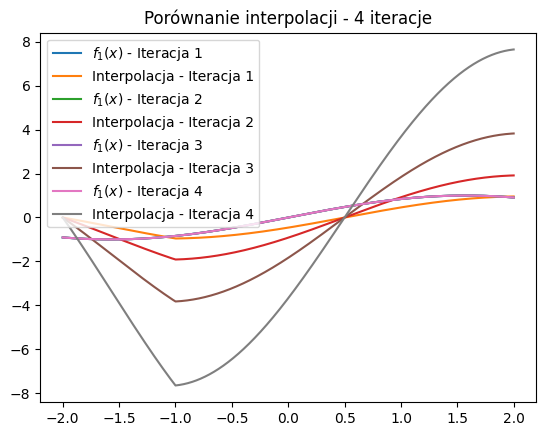

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Funkcje i jądra
def f1(x):
    return np.sin(x)

def h1(x):
    return np.where((x >= 0) & (x < 1), 1, 0)

# Parametry eksperymentu
num_points_large = 1000
num_iterations = 4

# Początkowe punkty (duża liczba punktów)
x_large = np.linspace(-2, 2, num_points_large)
delta_x_large = x_large[1] - x_large[0]

# Inicjalizacja punktów do interpolacji
x_current = x_large

# Iteracje interpolacji
for i in range(num_iterations):
    # Konwolucja
    g_current = delta_x_large * (np.convolve(f1(x_current), h1(x_current), mode='same'))
    
    # Przygotowanie punktów do kolejnej interpolacji (2 razy więcej punktów)
    x_high_res = np.linspace(x_current[0], x_current[-1], 2 * len(x_current) - 1)
    
    # Interpolacja do wyższej rozdzielczości
    g_current_high_res = np.interp(x_high_res, x_current, g_current)

    # Wykresy dla każdej iteracji
    plt.plot(x_high_res, f1(x_high_res), label=f'$f_1(x)$ - Iteracja {i+1}')
    plt.plot(x_high_res, g_current_high_res, label=f'Interpolacja - Iteracja {i+1}')

    # Przygotowanie punktów do kolejnej iteracji
    x_current = x_high_res

# Wykresy dla wyniku ostatniej interpolacji
plt.title(f'Porównanie interpolacji - {num_iterations} iteracje')
plt.legend()
plt.show()


Zadanie 2

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def max_pooling(image, pool_size):
    result = np.zeros((image.shape[0] // pool_size, image.shape[1] // pool_size), dtype=np.uint8)
    for i in range(0, image.shape[0], pool_size):
        for j in range(0, image.shape[1], pool_size):
            result[i // pool_size, j // pool_size] = np.max(image[i:i+pool_size, j:j+pool_size])
    return result

def bilinear_interpolation(image, scale_factor):
    height, width = image.shape
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    result = np.zeros((new_height, new_width), dtype=np.uint8)

    for i in range(new_height):
        for j in range(new_width):
            x = i / scale_factor
            y = j / scale_factor

            x1, y1 = int(np.floor(x)), int(np.floor(y))
            x2, y2 = min(x1 + 1, height - 1), min(y1 + 1, width - 1)

            result[i, j] = int(
                (1 - (x - x1)) * (1 - (y - y1)) * image[x1, y1] +
                (1 - (x - x1)) * (y - y1) * image[x1, y2] +
                (x - x1) * (1 - (y - y1)) * image[x2, y1] +
                (x - x1) * (y - y1) * image[x2, y2]
            )

    return result

# Wczytaj obraz w skali szarości
image = cv2.imread('sample_image.jpg', cv2.IMREAD_GRAYSCALE)

# Pomniejsz obraz za pomocą max pooling
small_image_max_pool = max_pooling(image, 2)

# Powiększ obraz za pomocą bilinearnej interpolacji
enlarged_image_bilinear = bilinear_interpolation(small_image_max_pool, 2)

# Wyświetl obrazy
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Oryginalny obraz')

plt.subplot(1, 3, 2)
plt.imshow(small_image_max_pool, cmap='gray')
plt.title('Pomniejszony obraz (Max Pooling)')

plt.subplot(1, 3, 3)
plt.imshow(enlarged_image_bilinear, cmap='gray')
plt.title('Powiększony obraz (Bilinear Interpolation)')

plt.show()

# Oblicz MSE
mse_max_pool = np.mean((image - small_image_max_pool)**2)
mse_bilinear = np.mean((image - enlarged_image_bilinear)**2)

print(f'MSE dla pomniejszonego obrazu (Max Pooling): {mse_max_pool:.2f}')
print(f'MSE dla powiększonego obrazu (Bilinear Interpolation): {mse_bilinear:.2f}')


AttributeError: 'NoneType' object has no attribute 'shape'